# This notebook shows an example to read the standard output and plot desired values

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.ticker as plticker


from matplotlib import rc
rc('text', usetex=True)

In [2]:
plt.tight_layout()
def plot_line(obj_dict, fname='', ylabel = '', legend=True):
    line_opt=dict(linewidth=3, markersize=12)
    fig = plt.figure(figsize=(10, 10))
    axes = fig.add_subplot(1, 1, 1)
    marker_list=["o", "v", "s", "D", "x", "*"]
    
#     axes.set_xlim(xmin * inc_factor, xmax * inc_factor)
#     axes.set_ylim(-1, 13)
#     axes.set_xlim(-1, len(x))
#     axes.set_yscale("log")
    
    axes.spines['right'].set_color('black')
    axes.spines['top'].set_color('black')
    axes.spines['left'].set_color('black')
    axes.spines['bottom'].set_color('black')
    
    axes.spines['right'].set_linewidth(3)
    axes.spines['top'].set_linewidth(3)
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    
    axes.tick_params(labelsize=20)

    for i, key in enumerate(obj_dict):
        name = key
        axes.plot(range(len(obj_dict[key])), 
                  obj_dict[key], 
                  label=name, **line_opt,
                  marker=marker_list[i]) 
    #     axes.legend(loc='upper right', prop={'size': 20})

    # loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
    # axes.xaxis.set_major_locator(loc)

    axes.legend(prop={'size': 20})
    axes.set_xlabel('epoch', fontsize=25)
    axes.set_ylabel(ylabel, fontsize=25)
    
    if fname != '':
        fig.savefig(fname, bbox_inches='tight')
    
    plt.show()

<Figure size 432x288 with 0 Axes>

In [3]:
def plot_together(obj_dict_list, mnames, fname='', ylabel = '', legend=True):
    obj_dict_1 = obj_dict_list[0]
    obj_dict_2 = obj_dict_list[1]

    line_opt=dict(linewidth=3, markersize=12)
    fig = plt.figure(figsize=(10, 10))
    axes = fig.add_subplot(1, 1, 1)
    marker_list=["o", "v", "s", "D", "x", "*"]
    
#     axes.set_xlim(xmin * inc_factor, xmax * inc_factor)
#     axes.set_ylim(-1, 13)
#     axes.set_xlim(-1, len(x))
#     axes.set_yscale("log")
    
    axes.spines['right'].set_color('black')
    axes.spines['top'].set_color('black')
    axes.spines['left'].set_color('black')
    axes.spines['bottom'].set_color('black')
    
    axes.spines['right'].set_linewidth(3)
    axes.spines['top'].set_linewidth(3)
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    
    axes.tick_params(labelsize=20)

    for i, key in enumerate(obj_dict_1):
        name = key
        axes.plot(range(len(obj_dict_1[key])), 
                  obj_dict_1[key], 
                  label=name+'-'+mnames[0], **line_opt,
                  marker=marker_list[i]) 

    for i, key in enumerate(obj_dict_2):
        name = key
        axes.plot(range(len(obj_dict_2[key])), 
                  obj_dict_2[key], 
                  label=name+'-'+mnames[1], **line_opt,
                  marker=marker_list[i]) 
    #     axes.legend(loc='upper right', prop={'size': 20})

    # loc = plticker.MultipleLocator(base=0.1) # this locator puts ticks at regular intervals
    # axes.yaxis.set_major_locator(loc)

    axes.legend(prop={'size': 20})
    axes.set_xlabel('epoch', fontsize=25)
    axes.set_ylabel(ylabel, fontsize=25)
    
    if fname != '':
        fig.savefig(fname, bbox_inches='tight')
    
    plt.show()

In [4]:
def read_file(fname, mode):
    flag = False
    start = True
    loss = []
    ppl = []
    acc = []
    with open(fname) as fin:

        
        for line in fin:
            #if line.startswith("update best loss"):
            #    kl += [kl_val]
            #    mi += [mi_val]
            #    kl_aggr += [max(kl_val - mi_val, 0)]
            if mode == 'trn':
                if line.startswith("epoch"): 
                    id_kl = line.find("loss")
                    id_kl_end = line.find(", ppl")
                    id_mi = line.find("ppl")
                    id_mi_end = line.find(", acc")
                    loss_val = float(line[id_kl+5:id_kl_end])
                    ppl_val = float(line[id_mi+4:id_mi_end])
                    
                    id_acc = line.find("acc")        
                    id_acc_end = line.find("\n")
                    acc_val = float(line[id_acc+4:id_acc_end])
                
                    loss += [loss_val]
                    ppl += [ppl_val]
                    acc += [acc_val]
            elif mode == 'val':
                if  line.startswith("VAL"):
                    id_kl = line.find("loss")
                    id_kl_end = line.find(", ppl")
                    id_mi = line.find("ppl")
                    id_mi_end = line.find(", acc")
                    loss_val = float(line[id_kl+5:id_kl_end])
                    ppl_val = float(line[id_mi+4:id_mi_end])
                    
                    id_acc = line.find("acc")        
                    id_acc_end = line.find("\n")
                    acc_val = float(line[id_acc+4:id_acc_end])
                
                    loss += [loss_val]
                    ppl += [ppl_val]
                    acc += [acc_val]
                    
    return loss, acc # ppl

In [5]:
our_data = {}
KL_name = 'nnl' #r"$D_{KL}(q_\phi(z | x) || p(z))$"
MI_name = 'ppl '#r"$I_q$"
KL_aggr_name = 'acc' #r"$D_{KL}(q_\phi(z) \| p(z))$"

In [6]:
loss_data_1 = {}
acc_data_1 = {}
modelname_1 = '4k_trmor_s2s_from_vae_frozen_decoder'
loss_data_1[KL_name], acc_data_1[KL_aggr_name] = read_file("../logs/"+modelname_1+".log", "trn")

In [7]:
loss_data_2 = {}
acc_data_2 = {}
modelname_2 = '4k_trmor_s2s_from_vae_frozen_decoder'
loss_data_2[KL_name], acc_data_2[KL_aggr_name] = read_file("../logs/"+modelname_2+".log", "val")

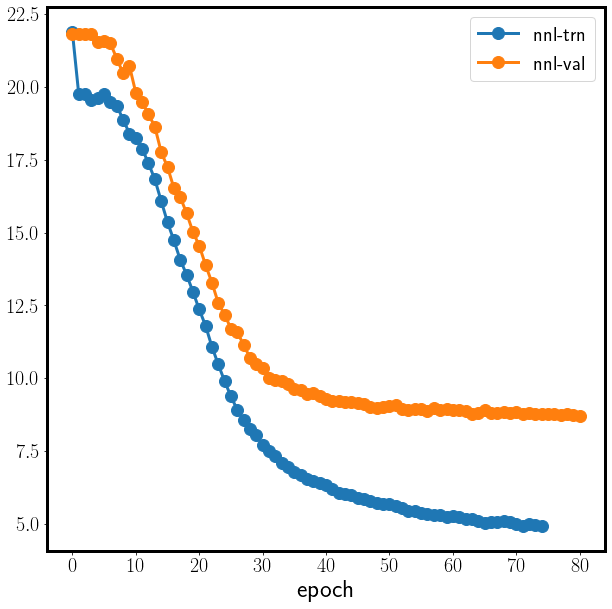

In [8]:
plot_together([loss_data_1, loss_data_2], ['trn', 'val'], fname=modelname_1+'-'+modelname_2+'_loss.pdf', legend=True)

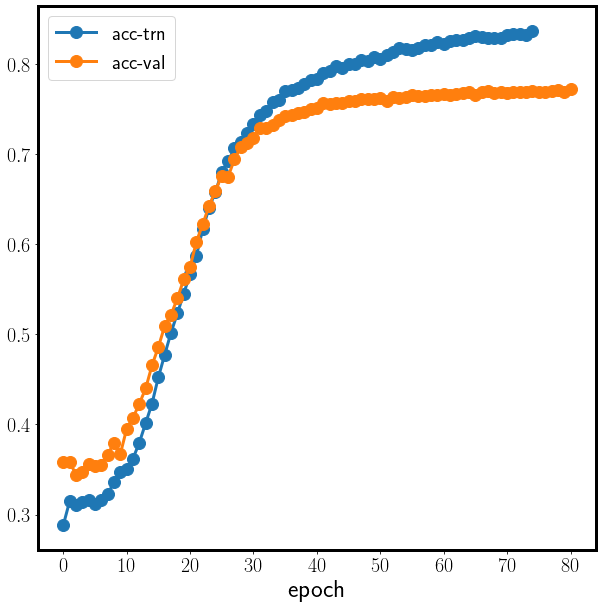

In [9]:
plot_together([acc_data_1, acc_data_2], ['trn', 'val'], fname=modelname_1+'-'+modelname_2+'_acc.pdf', legend=True)

In [ ]:
plot_line(loss_data_1, fname=modelname_1+'_loss.pdf', legend=True)
plot_line(acc_data_1, fname=modelname_1+'_acc.pdf', legend=True)